# Let's start with a simple dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

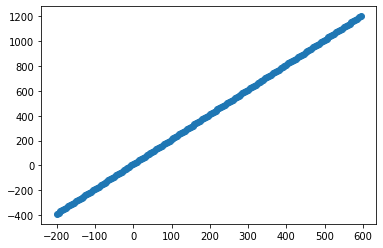

In [2]:
# Create the features
X = np.arange(-200, 600, 5)

# Create labels
y = X * 2 + 10

# Viusalize it
plt.scatter(X,y)

In [3]:
len(X)

160

In [4]:
y == (X*2 + 10)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Modelling

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, let's normalize the data

In [6]:
X_train.shape, y_train.shape

((128,), (128,))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train.reshape(-1,1))

X_train_normal = scaler.transform(X_train.reshape(-1,1))
X_test_normal = scaler.transform(X_test.reshape(-1,1))

In [8]:
# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
history_1 = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 498.7038 - mae: 498.7038
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 498.6137 - mae: 498.6137
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 498.5243 - mae: 498.5243
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 498.4304 - mae: 498.4304
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 498.3315 - mae: 498.3315
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 498.2244 - mae: 498.2244
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 498.1052 - mae: 498.1052
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 497.9710 - mae: 497.9710
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 497.8148 - mae: 497.8148
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 497.6310 - mae: 497.6310
Epoch 11/100
4/4 [=====================

In [9]:
# Evaluate the model
loss_1 = model_1.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 334.2474 - mae: 334.2474


## Improving our model

In [10]:
# Let's rebuild the model
# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model - this time, we change the optimizer to Adam
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 498.4346 - mae: 498.4346
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 498.2625 - mae: 498.2625
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 498.0884 - mae: 498.0884
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 497.8874 - mae: 497.8874
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 497.6760 - mae: 497.6760
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 497.4311 - mae: 497.4311
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 497.1311 - mae: 497.1311
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 496.8472 - mae: 496.8472
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 496.4774 - mae: 496.4774
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 496.0490 - mae: 496.0490
Epoch 11/100
4/4 [=====================

In [11]:
loss_2 = model_2.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 102ms/step - loss: 158.9750 - mae: 158.9750


In [12]:
# Let's rebuild the model
# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # this time, we increased the learning rate
                metrics=["mae"])

# Fit the model
history_3 = model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


4/4 [==============================] - 0s 3ms/step - loss: 498.2446 - mae: 498.2446
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 496.1235 - mae: 496.1235
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 491.6300 - mae: 491.6300
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 482.5220 - mae: 482.5220
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 463.7933 - mae: 463.7933
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 434.8961 - mae: 434.8961
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 392.6821 - mae: 392.6821
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 338.5258 - mae: 338.5258
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 308.8105 - mae: 308.8105
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 310.6721 - mae: 310.6721
Epoch 11/100
4/4 [==============================] -

In [13]:
# Evaluate the model
loss_3 = model_3.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 5.2217 - mae: 5.2217


In [14]:
# Let's rebuild the model
# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])

# Fit the model
history_4 = model_4.fit(X_train_normal, y_train, epochs=200) # this time, we train the model longer

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 497.8304 - mae: 497.8304
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 494.4185 - mae: 494.4185
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 486.8353 - mae: 486.8353
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 474.0065 - mae: 474.0065
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 448.8651 - mae: 448.8651
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 408.3349 - mae: 408.3349
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 362.3234 - mae: 362.3234
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 311.9030 - mae: 311.9030
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 299.8024 - mae: 299.8024
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 299.3539 - mae: 299.3539
Epoch 11/200
4/4 [=====================

In [15]:
# Evaluate the model
loss_4 = model_4.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 99ms/step - loss: 7.5928 - mae: 7.5928


In [16]:
X_train[0]

120

In [17]:
X_train_normal[0], y_train[0]

(array([0.40251572]), 250)

In [88]:
model_4.predict([[0.40251572]])

array([[243.85916]], dtype=float32)

In [19]:
# Let's make some predictions
y_preds = model_4.predict(X_test_normal)
y_preds[:10]

array([[ 977.752   ],
       [ 382.7038  ],
       [ 848.82495 ],
       [  65.344734],
       [ 700.0629  ],
       [-182.59209 ],
       [ 571.1358  ],
       [ -83.417366],
       [1106.6792  ],
       [ 581.0532  ]], dtype=float32)

## Comparing the losses

In [20]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", str(loss_1[0])[:5]],
                 ["model_2", str(loss_2[0])[:5]],
                 ["model_3", str(loss_3[0])[:5]],
                 ["model_4", str(loss_4[0])[:5]]]
all_results = pd.DataFrame(model_results, columns=["model", "mae"])
all_results

,model,mae
0,model_1,334.2
1,model_2,158.9
2,model_3,5.221
3,model_4,7.592


Looks like `model_4` performed the best

In [21]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


## Visualizing our model's predictions

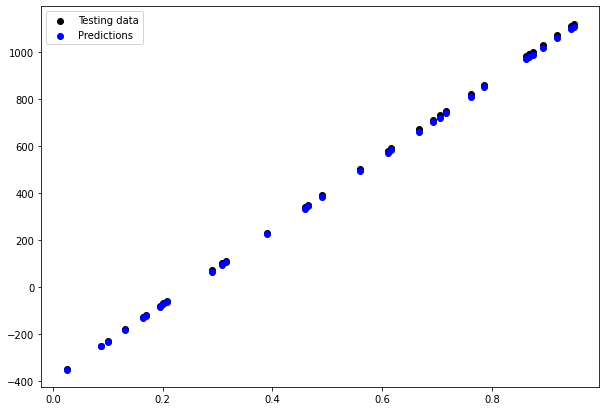

In [22]:
plt.figure(figsize=(10,7))
# Plot test data in black
plt.scatter(X_test_normal, y_test, c="black", label="Testing data")
# Plot models predictions in blue
plt.scatter(X_test_normal, y_preds, c="b", label="Predictions")
# Show the legend
plt.legend();

# Boston pricing dataset

In [34]:
dataset = tf.keras.datasets.boston_housing

In [35]:
(train_data, train_labels), (test_data, test_labels) = dataset.load_data()

In [43]:
train_data[0], train_labels[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]), 15.2)

In [45]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_data)

train_data_normal = scaler.transform(train_data)
test_data_normal = scaler.transform(test_data)

In [47]:
train_data_normal[0]

(array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
        0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
        0.89361702, 1.        , 0.46881898]),)

In [48]:
test_data_normal[0]

array([0.20319551, 0.        , 0.64662757, 0.        , 0.60493827,
       0.55635167, 1.        , 0.07359588, 1.        , 0.91395793,
       0.80851064, 0.06790559, 0.75386313])

In [56]:
len(train_data_normal), len(train_labels), len(test_data_normal), len(test_labels)

(404, 404, 102, 102)

In [49]:
# Create a model - Let's use model_4 from the last regression project (we'll call it model_5 from now on)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])

# Fit the model
history_5 = model_5.fit(train_data_normal, train_labels, epochs=200, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [50]:
# Evaluate the model
model_5.evaluate(test_data_normal, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 3.5498 - mae: 3.5498


[3.5498266220092773, 3.5498266220092773]

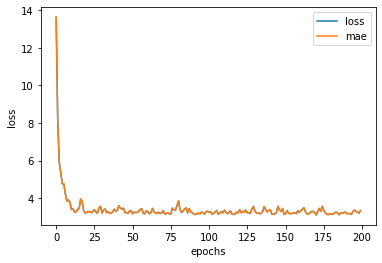

In [52]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [54]:
y_preds_5 = model_5.predict(test_data_normal)

In [80]:
a = y_preds_5[0] + 2
float(a)

11.223134994506836

In [87]:
from random import randint
for i in range(10):
  i = randint(1,50)
  print("Predicted: " + str(y_preds_5[i])[1:5] + ", Actual: " + str(test_labels[i]))

Predicted: 19.8, Actual: 19.0
Predicted: 18.4, Actual: 20.5
Predicted: 13.8, Actual: 20.8
Predicted: 15.7, Actual: 17.8
Predicted: 14.2, Actual: 20.1
Predicted: 19.4, Actual: 22.0
Predicted: 13.1, Actual: 18.5
Predicted: 25.4, Actual: 28.4
Predicted: 15.7, Actual: 17.8
Predicted: 11.7, Actual: 9.5
